In [1]:
from os.path import expanduser, join
output_dir = expanduser('~/output/online_sinkhorn/online_grid5')

In [2]:
import pandas as pd

df_ = pd.read_pickle(join(output_dir, 'all.pkl'))

df_['data_source'].value_counts()

dragon     395004
gmm_1d     394902
gmm_2d     394902
gmm_10d    394902
Name: data_source, dtype: int64

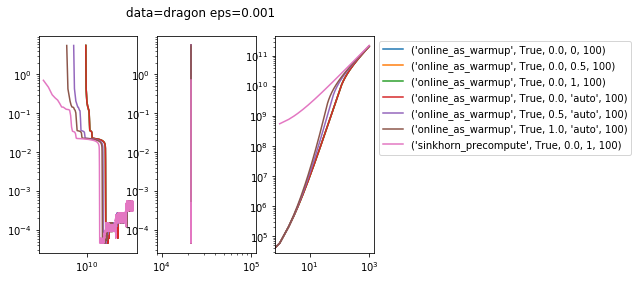

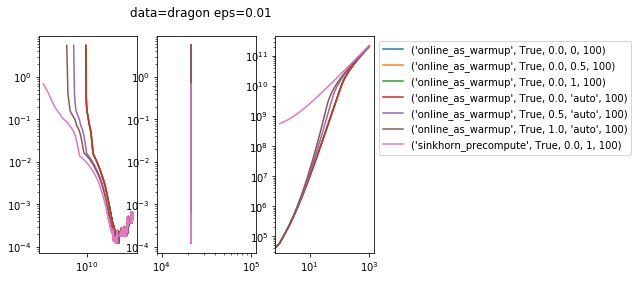

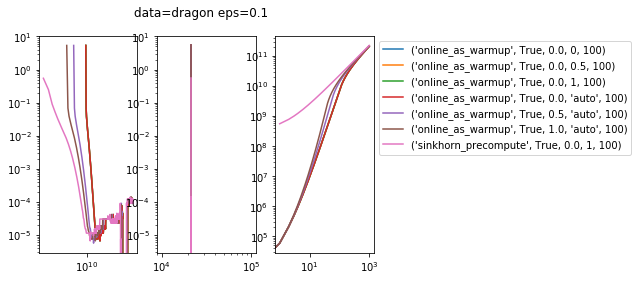

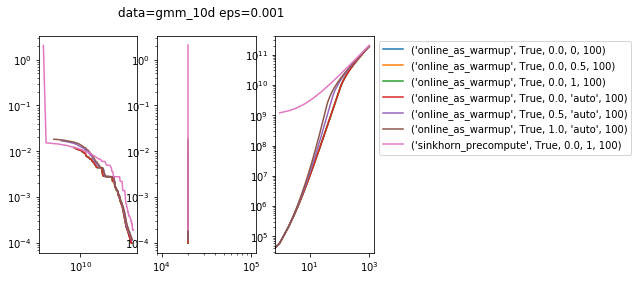

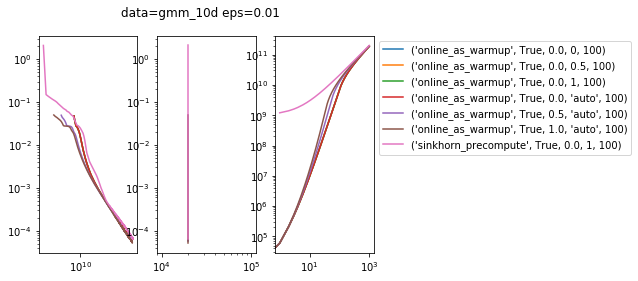

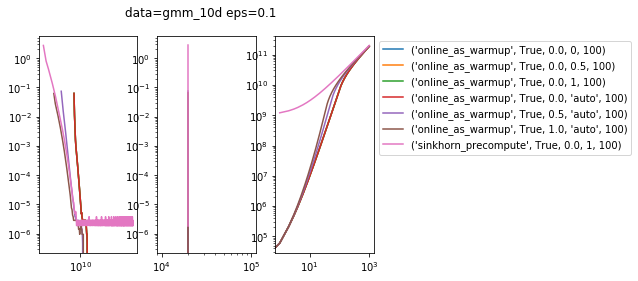

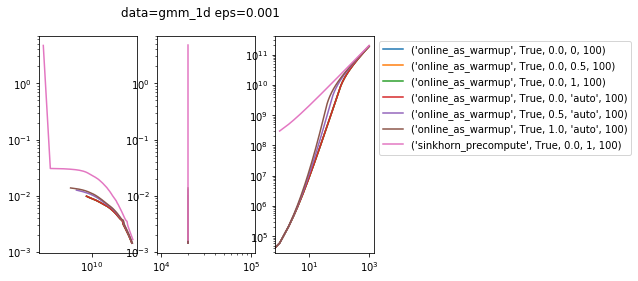

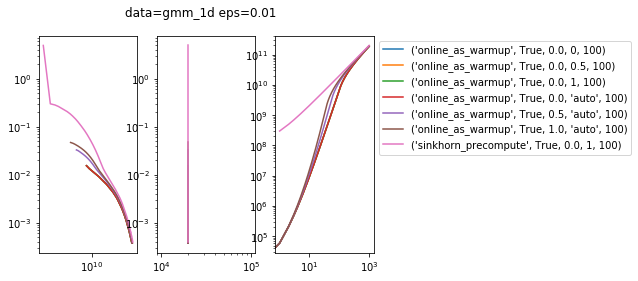

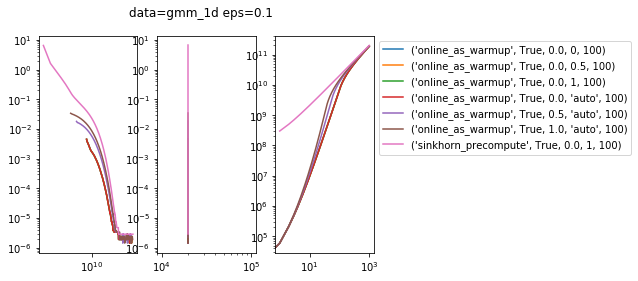

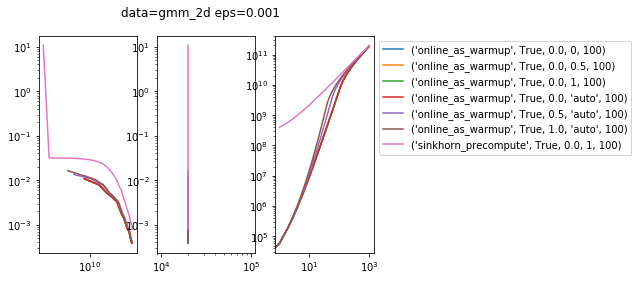

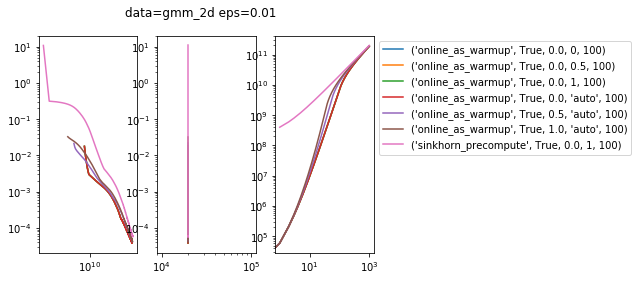

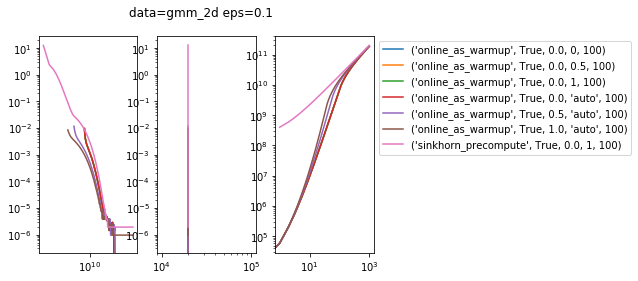

In [64]:
import matplotlib.pyplot as plt
df = df_.copy()
df = df.query('method != "online"')
df  = df.query('method != "random"')
df  = df.query('method != "sinkhorn"')
# df = df.query('lr_exp == "auto" | method != "online_as_warmup"')
df = df.query('refit == True | method != "online_as_warmup"')
df = df.query('method != "subsampled"')
for (data_source, epsilon), df2 in df.groupby(by=['data_source', 'epsilon']):
    fig, axes = plt.subplots(1, 3)
    for index, df3 in df2.groupby(by=['method', 'refit', 'batch_exp', 'lr_exp', 'batch_size']):
        n_calls = df3['n_calls']
        n_samples = df3['n_samples']
        train = df3['fixed_err']
        test = df3['ref_err_test']
        axes[0].plot(df3['n_calls'], train, label=index)
        axes[1].plot(n_samples, train, label=index)
        axes[2].plot(df3['n_iter'], df3['n_calls'], label=index)
        axes[2].legend(bbox_to_anchor=(1, 1), loc='upper left')
        for ax in axes:
            ax.set_xscale('log')
            ax.set_yscale('log')
    fig.suptitle(f'data={data_source} eps={epsilon}')
    plt.show()

In [23]:
import matplotlib.pyplot as plt
!!df = df_.copy()
df = df.query('method != "online_as_warmup"')
df  = df.query('method != "sinkhorn_precompute"')
# df = df.query('method != "random"')
for (data_source, epsilon), df2 in df.groupby(by=['data_source', 'epsilon']):
    fig, axes = plt.subplots(1, 3)
    for index, df3 in df2.groupby(by=['method', 'refit', 'batch_exp', 'lr_exp', 'batch_size']):
        n_iter = df3['n_iter']
        n_calls = df3['n_calls']
        n_samples = df3['n_samples']
        train = df3['ref_err_train']
        test = df3['ref_err_test']
        axes[0].plot(n_calls, train, label=index)
        axes[1].plot(n_samples, train, label=index)
        axes[2].plot(n_iter, n_calls, label=index)
        axes[2].legend(bbox_to_anchor=(1, 1), loc='upper left')
        for ax in axes:
            ax.set_xscale('log')
            ax.set_yscale('log')
    fig.suptitle(f'data={data_source} eps={epsilon}')
    plt.show()

In [61]:
s = df_.query('method == "online_as_warmup" & refit == True & batch_exp == 0.0 & lr_exp == "auto" & data_source == "dragon" & epsilon == 1e-1')

In [62]:
s.query('algorithm == "full"').iloc[:10]

,n_iter,n_calls,n_samples,algorithm,ref_err_train,ref_err_test,fixed_err,w,batch_exp,exp_dir,...,batch_size,data_source,device,epsilon,lr,lr_exp,max_length,method,refit,seed
112,112,9492570000,21102,full,0.218940,0.218940,5.365879,8.350019,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
113,113,9714610000,21102,full,0.162843,0.162843,0.068255,8.348132,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
114,114,9936650000,21102,full,0.128015,0.128015,0.038477,8.347488,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
115,115,10158690000,21102,full,0.102750,0.102750,0.027996,8.347109,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
116,116,10380730000,21102,full,0.082408,0.082408,0.021243,8.346834,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
117,117,10602770000,21102,full,0.065949,0.065949,0.016623,8.346621,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
118,118,10824810000,21102,full,0.052681,0.052681,0.013307,8.346450,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
119,119,11046850000,21102,full,0.042038,0.042038,0.010647,8.346312,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
120,120,11268890000,21102,full,0.033525,0.033525,0.008516,8.346200,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0
121,121,11490930000,21102,full,0.026723,0.026723,0.006803,8.346109,0.0,228,...,100,dragon,cuda,0.1,1,auto,100000,online_as_warmup,True,0


In [63]:
s = df_.query('method == "sinkhorn" & data_source == "dragon" & epsilon == 1e-1')
s.iloc[:10]

,n_iter,n_calls,n_samples,algorithm,ref_err_train,ref_err_test,fixed_err,w,batch_exp,exp_dir,...,batch_size,data_source,device,epsilon,lr,lr_exp,max_length,method,refit,seed
0,1,888160000,21102,full,0.471617,0.471617,0.546770,8.339236,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
1,2,1776320000,21102,full,0.259338,0.259338,0.248796,8.346210,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
2,3,2664480000,21102,full,0.176761,0.176761,0.090182,8.347101,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
3,4,3552640000,21102,full,0.131817,0.131817,0.051255,8.347110,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
4,5,4440800000,21102,full,0.102858,0.102858,0.032948,8.346951,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
5,6,5328960000,21102,full,0.082178,0.082178,0.023128,8.346766,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
6,7,6217120000,21102,full,0.065595,0.065595,0.017255,8.346591,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
7,8,7105280000,21102,full,0.052331,0.052331,0.013384,8.346437,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
8,9,7993440000,21102,full,0.041705,0.041705,0.010671,8.346308,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
9,10,8881600000,21102,full,0.033215,0.033215,0.008507,8.346199,0.0,8,...,100,dragon,cuda,0.1,1,1,100000,sinkhorn,True,0
